# Problem Definition
With the given dataset, build a model to predict '**audience_rating**'.demonstrate the working of the pipeline with a notebook, also validate the model for its accuracy

# Importing Libraries

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error ,mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from textblob import TextBlob

# Importing Data

In [38]:
df = pd.read_excel('Rotten_Tomatoes_Movies3.xls')

In [39]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


# EDA

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [41]:
# Check for missing values
df.isnull().sum()

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64

<Axes: >

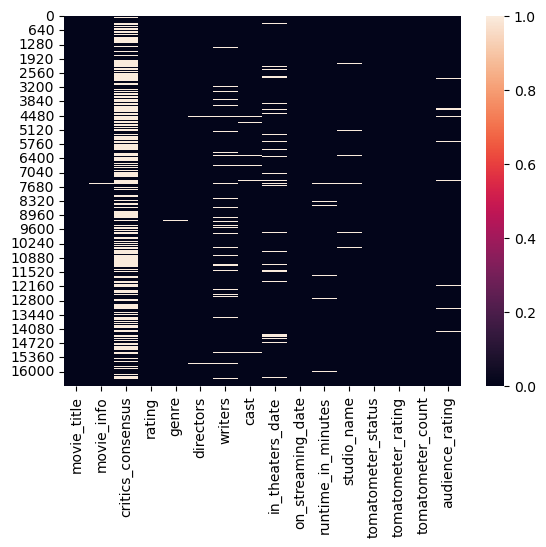

In [42]:
sns.heatmap(df.isnull())

In [43]:
# checking for stats
df.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


In [44]:
# Drop rows with missing target values
df = df.dropna(subset=['audience_rating'])

# Convert columns as needed, e.g., `in_theaters_date` to datetime
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'], errors='coerce')
df['on_streaming_date	'] = pd.to_datetime(df['on_streaming_date'], errors='coerce')
df['release_year'] = df['in_theaters_date'].dt.year

# Visualization

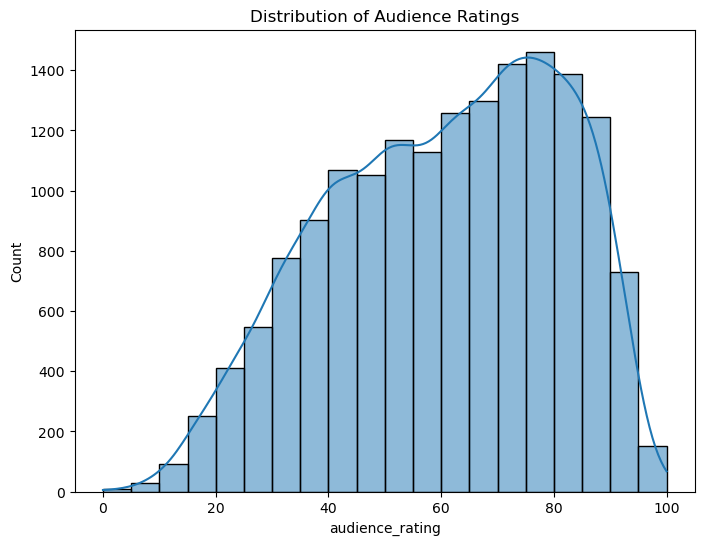

In [45]:
# Visualize the distribution of audience ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['audience_rating'], bins=20, kde=True)
plt.title('Distribution of Audience Ratings')
plt.show()



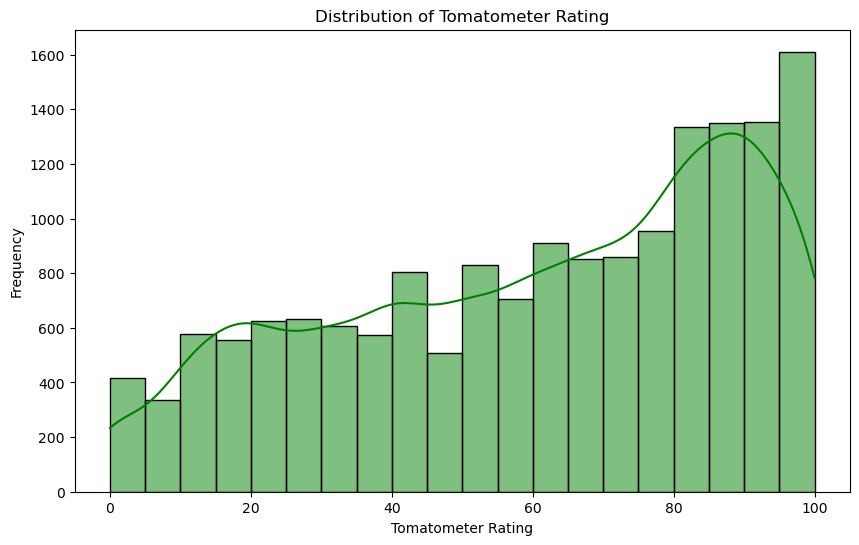

In [46]:
# Distribution of tomatometer_rating
plt.figure(figsize=(10, 6))
sns.histplot(df['tomatometer_rating'], kde=True, bins=20, color='green')
plt.title('Distribution of Tomatometer Rating')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Frequency')
plt.show()

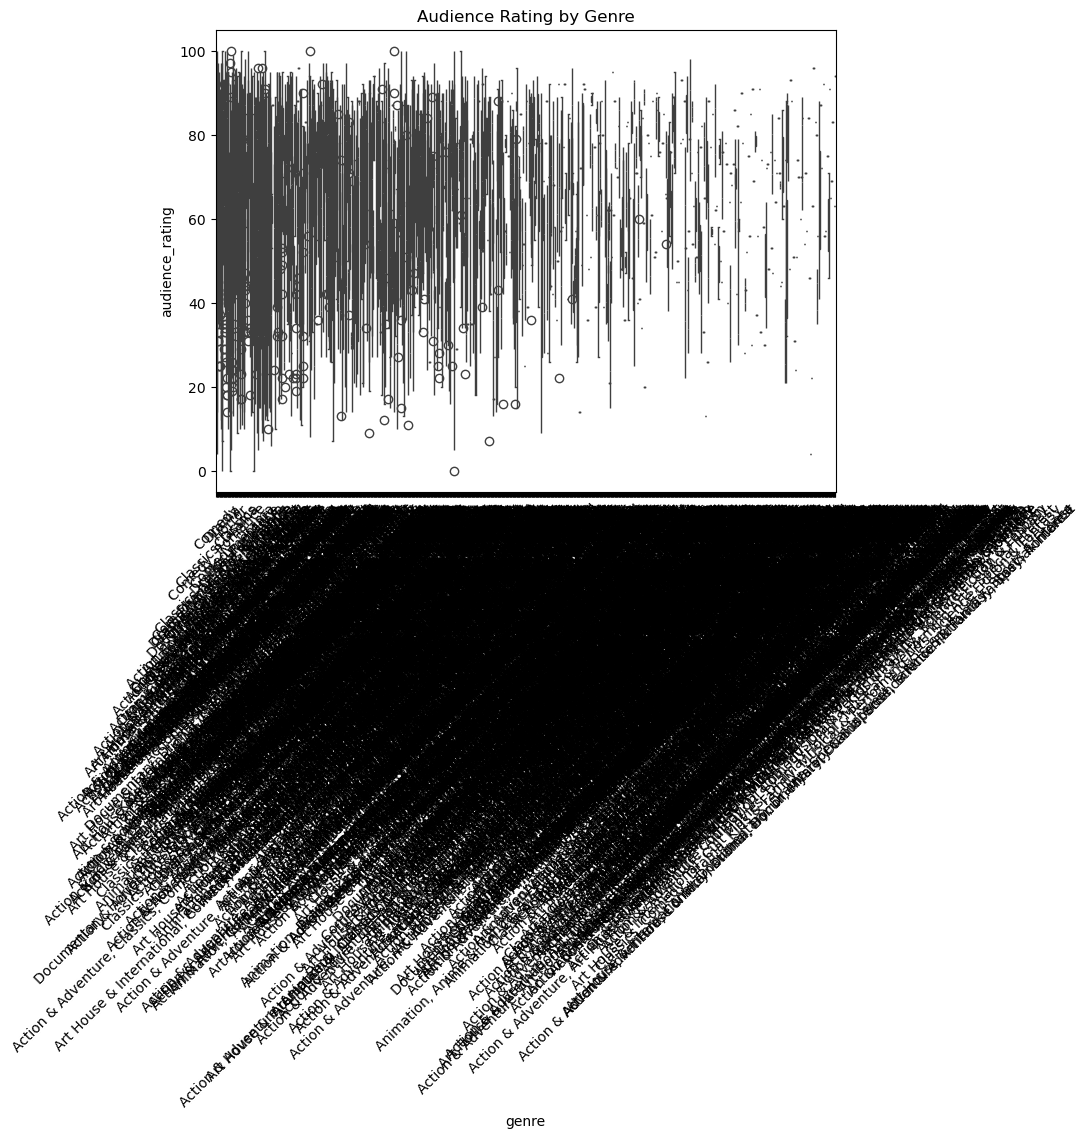

In [47]:
# Genre vs Audience Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='genre', y='audience_rating', data=df)
plt.title('Audience Rating by Genre')
plt.xticks(rotation=45)
plt.show()


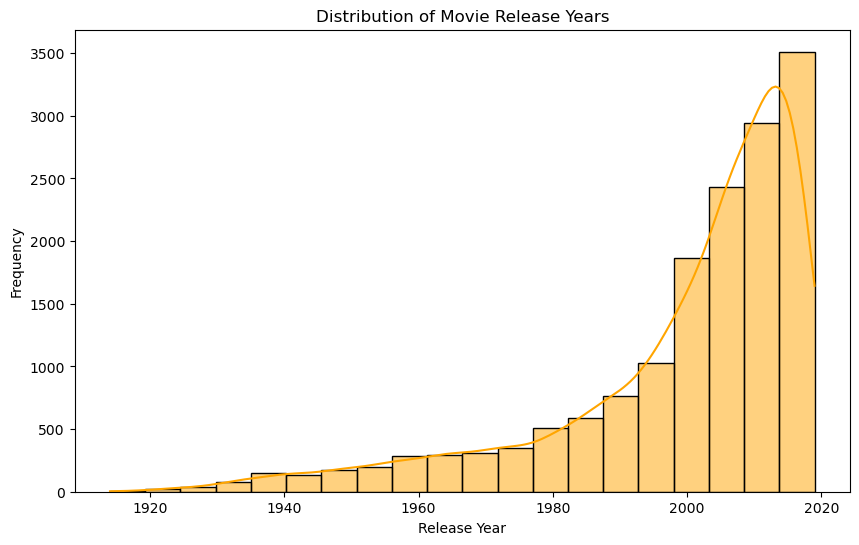

In [48]:
# Histogram of movie release years
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], bins=20, kde=True, color='orange')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


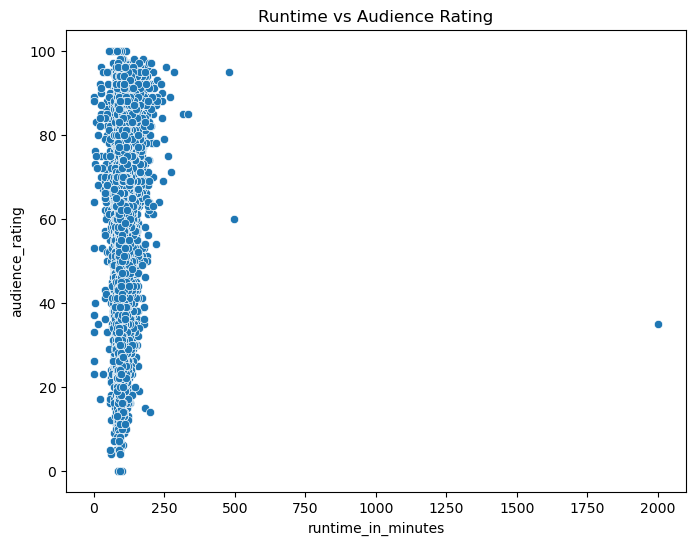

In [49]:
# Runtime vs Audience Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='runtime_in_minutes', y='audience_rating', data=df)
plt.title('Runtime vs Audience Rating')
plt.show()

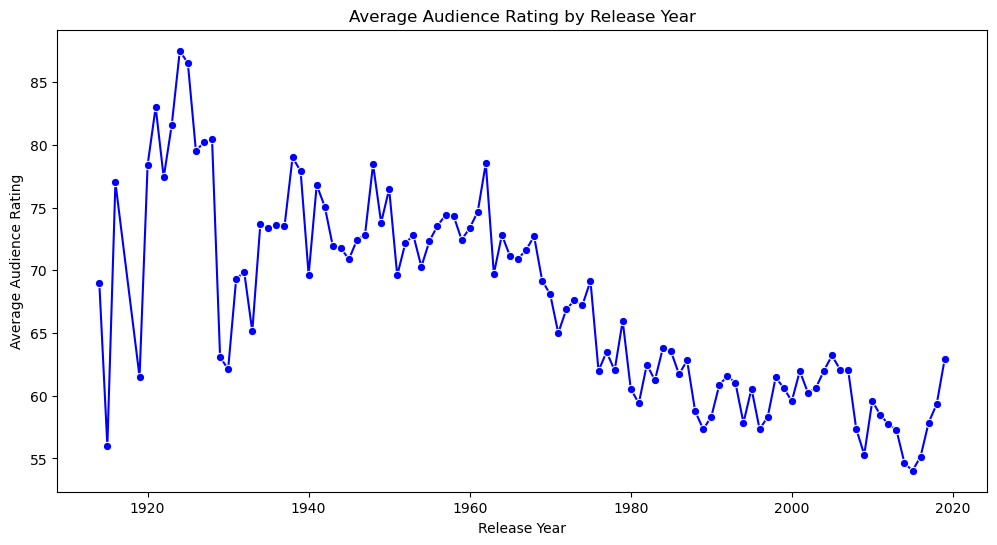

In [50]:
# Line plot for average audience rating over the years
avg_rating_by_year = df.groupby('release_year')['audience_rating'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='audience_rating', data=avg_rating_by_year, marker='o', color='blue')
plt.title('Average Audience Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Audience Rating')
plt.show()


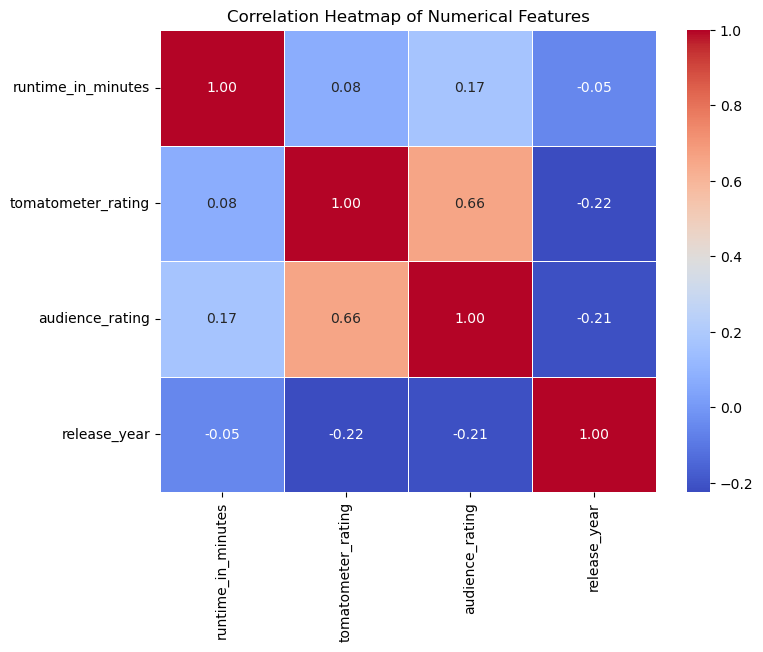

In [51]:
# Correlation Heatmap
corr_matrix = df[['runtime_in_minutes', 'tomatometer_rating', 'audience_rating', 'release_year']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


# Data Cleaning

In [52]:
# Data Cleaning and Preprocessing filling missing data

# filling critics consensus with unknowns as 50% data is null 
df['critics_consensus'] = df['critics_consensus'].astype(str).fillna('Unknown') 
df['movie_title'] = df['movie_title'].astype(str).fillna(df['movie_title'].mode()[0])
df['genre'] = df['genre'].fillna(df['genre'].astype(str).mode()[0])
df['directors'] = df['directors'].astype(str).fillna(df['directors'].mode()[0])
df['writers'] = df['writers'].astype(str).fillna(df['writers'].mode()[0])
df['cast'] = df['cast'].astype(str).fillna(df['cast'].mode()[0])
df['studio_name'] = df['studio_name'].astype(str).fillna(df['studio_name'].mode()[0])
df['runtime_in_minutes'] = df['runtime_in_minutes'].fillna(df['runtime_in_minutes'].mean())

# Feature Engineering

**Calculating The Avg Rating for  Each Genre**

In [53]:
# Explode the 'genre' column and calculate average 'audience_rating' for each genre
df['genre'] = df['genre'].str.split(', ')
df = df.explode('genre')
average_rating_by_genre = df.groupby('genre')['audience_rating'].mean().reset_index()
df = df.merge(average_rating_by_genre, on='genre', how='left', suffixes=('', '_rating'))

df['genre_rating'] = df.groupby('movie_title')['audience_rating_rating'].transform('mean')

In [54]:
# Aggregate the data to movie level
df = df.groupby([
    'movie_title', 'movie_info', 'critics_consensus', 'rating', 'directors', 
    'writers', 'cast', 'studio_name', 'tomatometer_status'
]).agg({
    'runtime_in_minutes': 'mean',
    'tomatometer_rating': 'mean',
    'tomatometer_count': 'mean',
    'audience_rating': 'mean',
    'genre_rating': 'mean'
}).reset_index()

**Extracting More Features**

In [55]:

# Sentiment Analysis on Critics' Consensus 
df['critics_sentiment'] = df['critics_consensus'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Interaction feature: 'runtime_in_minutes' and 'genre_rating'
df['runtime_genre_interaction'] = df['runtime_in_minutes'] * df['genre_rating']

# Binned the runtime feature 
df['runtime_binned'] = pd.cut(df['runtime_in_minutes'], bins=[0, 90, 150, 300], labels=['short', 'medium', 'long'])


**Selecting Numerical and Categorical Feature Columns**

In [56]:
# Feature Columns
numerical_cols = ['runtime_in_minutes', 'tomatometer_rating', 'tomatometer_count', 'genre_rating', 
                  'critics_sentiment', 'runtime_genre_interaction']
categorical_cols = ['tomatometer_status', 'runtime_binned']

# Data Preprocessing

In [57]:
# Preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Preprocessed numerical and categorical features
numerical_and_categorical_features = preprocessor.fit_transform(df)

**Splitting Data**

In [58]:

X = numerical_and_categorical_features
y = df['audience_rating'] # target column

In [59]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Selection

**Hyperparameter Grids for Multiple Models**

In [60]:
# Hyperparameter Grids for Multiple Models
rf_param_grid = {
    'n_estimators': [300],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}

gb_param_grid = {
    'n_estimators': [300],
    'max_depth': [5],
    'learning_rate': [0.05],
    'subsample': [0.8]
}

xgb_param_grid = {
    'n_estimators': [300],
    'max_depth': [5],
    'learning_rate': [0.05],
    'subsample': [0.8],
}



# Training Different Model For Best Results

**Linear Regression Model**

In [61]:
# --- Model Training and Evaluation ---
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


lr_preds = lr_model.predict(X_test)

mse = mean_squared_error(y_test, lr_preds)
rmse = root_mean_squared_error(y_test, lr_preds)
r2 = r2_score(y_test, lr_preds)
mae = mean_absolute_error(y_test, lr_preds)

n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

non_zero_indices = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_indices] - lr_preds[non_zero_indices]) / y_test[non_zero_indices])) * 100

# Print Results
print("\n Linear Regression\n")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Adjusted R2 Score:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)


 Linear Regression

Mean Squared Error: 199.24163342614656
Root Mean Squared Error: 14.11529785113111
R2 Score: 0.5116338020493449
Mean Absolute Error: 11.292858296983088
Adjusted R2 Score: 0.5103373428756961
Mean Absolute Percentage Error (MAPE): 24.513345805203194


**Random Forest Regressor**

In [62]:
rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
rf_preds = best_rf_model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, rf_preds)
rmse = root_mean_squared_error(y_test, rf_preds)
r2 = r2_score(y_test, rf_preds)
mae = mean_absolute_error(y_test, rf_preds)

n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

non_zero_indices = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_indices] - rf_preds[non_zero_indices]) / y_test[non_zero_indices])) * 100

# Print Results
print("\nRandom Forest\n")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Adjusted R2 Score:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Random Forest

Mean Squared Error: 192.84655125395923
Root Mean Squared Error: 13.886920150053403
R2 Score: 0.5273089494184353
Mean Absolute Error: 10.979363419702196
Adjusted R2 Score: 0.5260541028475634
Mean Absolute Percentage Error (MAPE): 23.95375041367849


**Gradient Boosting Regressor**

In [63]:
gb_model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_
gb_preds = best_gb_model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, gb_preds)
rmse = root_mean_squared_error(y_test, gb_preds)
r2 = r2_score(y_test, gb_preds)
mae = mean_absolute_error(y_test, gb_preds)

n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

non_zero_indices = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_indices] - gb_preds[non_zero_indices]) / y_test[non_zero_indices])) * 100

# Print Results
print("\nGradient Boosting Regressor\n")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Adjusted R2 Score:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Gradient Boosting Regressor

Mean Squared Error: 191.42453009669825
Root Mean Squared Error: 13.83562539593705
R2 Score: 0.5307945013788109
Mean Absolute Error: 10.918505028091142
Adjusted R2 Score: 0.5295489078558223
Mean Absolute Percentage Error (MAPE): 23.815493613445145


**XGB Regressor**

In [64]:
xgb_model = XGBRegressor(random_state=42)

grid_search = GridSearchCV(gb_model, param_grid=xgb_param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
xgb_preds = best_xgb_model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, xgb_preds)
rmse = root_mean_squared_error(y_test, xgb_preds)
r2 = r2_score(y_test, xgb_preds)
mae = mean_absolute_error(y_test, xgb_preds)

n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

non_zero_indices = y_test != 0
mape = np.mean(np.abs((y_test[non_zero_indices] - xgb_preds[non_zero_indices]) / y_test[non_zero_indices])) * 100

# Print Results
print("\nXGB Regressor\n")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Adjusted R2 Score:", adjusted_r2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Fitting 5 folds for each of 1 candidates, totalling 5 fits

XGB Regressor

Mean Squared Error: 191.42453009669825
Root Mean Squared Error: 13.83562539593705
R2 Score: 0.5307945013788109
Mean Absolute Error: 10.918505028091142
Adjusted R2 Score: 0.5295489078558223
Mean Absolute Percentage Error (MAPE): 23.815493613445145


# Validating The Model Score

In [65]:
# Cross-validation for Random Forest
cv_scores = cross_val_score(best_xgb_model, X, y, cv=5, scoring='r2')
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV R2 Score:", np.mean(cv_scores))



Cross-Validation Scores: [0.51357707 0.52569936 0.50921879 0.52923407 0.53088504]
Mean CV R2 Score: 0.5217228646051577


**Distribution of Residuals**

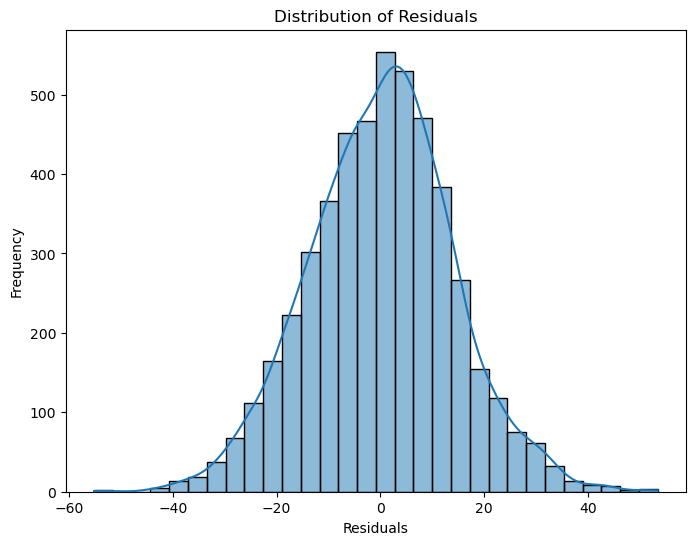

In [66]:
residuals = y_test - xgb_preds
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


The Best Results are produced by the XGBOOST and GradientBoostRegressor model